# Optimisation: First example

This example shows you how to run an optimisation with Pints.

We will start very simple, mimising a general error function and maximising a likelihood, before moving on to the _time series problems_ that PINTS specialises in.

First, we import the `pints` module:

In [1]:
import pints

Next, we need an [ErrorMeasure](https://pints.readthedocs.io/en/stable/error_measures.html) to minimise, or alternatively a [LogPDF](https://pints.readthedocs.io/en/stable/log_pdfs.html#pints.LogPDF) (representing a distribution) to maximise.

For now, we will define a very simple parabola:

In [2]:
class MyError(pints.ErrorMeasure):
    
    def n_parameters(self):
        # This method tells the optimiser the dimensionality of the problem
        return 1
    
    def __call__(self, p):
        # This method accepts a vector of n_parameters parameters, and
        # should return a scalar error.
        x = p[0]
        return (x - 10)**2
    
error = MyError()
print(error([1]))
print(error([5]))
print(error([9.9]))

81
25
0.009999999999999929


This slightly strange looking class is a Python "[callable](https://docs.python.org/3/reference/datamodel.html#object.__call__)": a class that can be called like a function.
These are used throughout PINTS, because they provide the benefits of objects while simultaneously acting as the mathematical "functions" we usually think about in optimisation.

Next, we call on PINTS to find the parameter vector (in this case containing just a single value) that minimises our error function:

In [3]:
# Define an initial guess
x0 = [1]

# Run an optimisation
found_parameters, found_error = pints.optimise(error, x0, method=pints.NelderMead)

Minimising error measure
Using Nelder-Mead
Running in sequential mode.
Iter. Eval. Best      Current   Time    
0     2      81        81         0:00.0
1     3      80.1025   80.1025    0:00.0
2     4      80.1025   80.1025    0:00.0
3     5      78.3225   78.3225    0:00.0
20    22     0.0625    0.0625     0:00.0
40    42     1.14e-28  1.14e-28   0:00.0
60    62     1.14e-28  1.14e-28   0:00.0
80    82     1.14e-28  1.14e-28   0:00.0
100   102    1.14e-28  1.14e-28   0:00.0
120   122    0         0          0:00.0
140   142    0         0          0:00.0
160   162    0         0          0:00.0
180   182    0         0          0:00.0
200   202    0         0          0:00.0
220   222    0         0          0:00.0
228   229    0         0          0:00.0
Halting: No significant change for 200 iterations.


We can now have a look at the obtained parameters

In [4]:
print('Obtained parameters', found_parameters)

Obtained parameters [10.]


As well as the final error:

In [5]:
print('Final parameters', found_error)

Final parameters 0.0


We can look at the original call in some more detail:

```
pints.optimise(error, x0, method=pints.NelderMead)
```

This calls the short-hand function `optimise` (below we will use a more verbose but far more flexible syntax) with the `error` we defined, our starting position `x0`, and a `method` argument.
The `method` argument specifies the optimisation algorithm to use, and should be a class that implements the [pints.Optimiser](https://pints.readthedocs.io/en/stable/optimisers/base_classes.html#pints.Optimiser) interface.
A list of optimisers included in PINTS [can be found here](https://pints.readthedocs.io/en/stable/optimisers/index.html).
For this example we used the "[Nelder-Mead](https://pints.readthedocs.io/en/stable/optimisers/nelder_mead.html) simplex algorithm".

We'll now take a quick look at the printed output:

```
Minimising error measure
Using Nelder-Mead
Running in sequential mode.
```

These first few lines tell us what PINTS is about to do: it will minimise an error measure, using the method called "Nelder-Mead", and it will run in "sequential mode".
This last bit means that only a single CPU process will be used.

Next, we get a log of the optimiser's progress:
```
Iter. Eval. Best      Current   Time    
0     2      81        81         0:00.0
1     3      80.1025   80.1025    0:00.0
```
The first two numbers are the iteration count and the number of evaluations of the error function.
Here we can see that we needed two evaluations for the initial iteration, but then just one for the next.

The next two numbers show the best obtained "score" (i.e. the lowest error) and the current score.
For Nelder-Mead, the best score will always be the current score, but more complex methods allow exploratory steps in which the error temporarily becomes higher.

The final field shows the elapsed time in hours, minutes, and seconds.

Finally, the method prints
```
100   102    1.14e-28  1.14e-28   0:00.0
120   122    0         0          0:00.0
140   142    0         0          0:00.0
160   162    0         0          0:00.0
180   182    0         0          0:00.0
200   202    0         0          0:00.0
220   222    0         0          0:00.0
228   229    0         0          0:00.0
Halting: No significant change for 200 iterations.
```

We see that the error went to 0, and then stayed at 0 for 200 iterations, causing the optimisation to halt.
Below, we will see how we can choose different _stopping criteria_.

## Maximising a likelihood

When working in a statistical context, instead of _minimising_ some error function, you might want to define a _likelihood_ to _maximise_.
PINTS facilitates this through the [LogPDF](https://pints.readthedocs.io/en/stable/log_pdfs.html#pints.LogPDF) interface, which is used to represent probability density functions including likelihoods, priors, and Bayesian posterior distributions.
All methods that accept `ErrorMeasures` will accept `LogPDF` instances as well, and automatically switch from minimising to maximising.

For example, we can define a Normal distribution centered around 5, and use the same method as above to find this optimum:

In [6]:
import numpy as np

class NormalLogPDF(pints.LogPDF):

    def n_parameters(self):
        # This method tells the optimiser the dimensionality of the problem
        return 1

    def __call__(self, p):
        # This method accepts a vector of n_parameters parameters, and
        # should return a scalar log-likelihood.
        return -0.5 * np.log(2 * np.pi) -0.5 * (p[0] - 5)**2


# Create a logpdf
logpdf = NormalLogPDF()

# Define an initial guess
x0 = [10]

# Run an optimisation
found_parameters, found_logpdf = pints.optimise(logpdf, x0, method=pints.NelderMead)

Maximising LogPDF
Using Nelder-Mead
Running in sequential mode.
Iter. Eval. Best      Current   Time    
0     2     -13.41894 -13.41894   0:00.0
1     3     -13.41894 -13.41894   0:00.0
2     4     -13.41894 -13.41894   0:00.0
3     5     -8.918939 -8.918939   0:00.0
20    22    -0.919    -0.919      0:00.0
40    42    -0.919    -0.919      0:00.0
60    62    -0.919    -0.919      0:00.0
80    82    -0.919    -0.919      0:00.0
100   102   -0.919    -0.919      0:00.0
120   122   -0.919    -0.919      0:00.0
140   142   -0.919    -0.919      0:00.0
160   162   -0.919    -0.919      0:00.0
180   182   -0.919    -0.919      0:00.0
200   202   -0.919    -0.919      0:00.0
208   209   -0.919    -0.919      0:00.0
Halting: No significant change for 200 iterations.


And as before we can check that it found the expected result:

In [7]:
print('Obtained parameters', found_parameters)

Obtained parameters [5.]


## Optimising more complicated "functions"

Using the methods above, any callable class that implements the [ErrorMeasure](https://pints.readthedocs.io/en/stable/error_measures.html#pints.ErrorMeasure) interface or [LogPDF](https://pints.readthedocs.io/en/stable/log_pdfs.html#pints.LogPDF) interface can be optimised.
By design, this can be quite a complicated class, as shown in this pseudo-code example:

```
class ARealisticError(pints.ErrorMeasure):

    def __init__(self):
        Initialise fast-running external library
        Initialise parallelisation
    
    def n_parameters(self):
        return high number of parameters
    
    def __call__(self, p):
        Make call to external library, return error
```

This way, arbitrarily complex "error functions" can be defined and optimised.

However, PINTS specialises in cases where the error function (or likelihood) is calculated as the difference between two _time series_.
These are discussed below.

## Fitting time-series models

In this section, we show how PINTS can be used to define a _model_ (e.g. a simulation), a _problem_ (comparing a simulation to a specific data set), and finally an error function to optimise.

We start by defining a Model that implements the [pints.ForwardModel interface](http://pints.readthedocs.io/en/latest/core_classes_and_methods.html#forward-model).
Like the `Error` and `LogPDF` classes, this has just two main methods: One to declare the number of parameters, and one to run _simulations_.

We won't give a full example here, but typically it will look a bit like this:

In [8]:
class MyModel(pints.ForwardModel):
    def __init__(self):
        # Here, we might instantiate a simulation using some
        # external simulation library
        self.simulation = ...
    
    def n_parameters(self):
        # Define the number of parameters you'll want to optimise
        return 10
    
    def simulate(self, parameters, times):
        # Run a simulation with the given parameters, log all the results
        # at the given times, and return
        self.simulation.set_parameters(parameters)
        return self.simulation.run(times)

To keep it simple, we will use a predefined model from [PINTS' toy model collection](http://pints.readthedocs.io/en/latest/toy/index.html): in this case a [logistic model](https://en.wikipedia.org/wiki/Logistic_function).

In [9]:
import pints.toy as toy
model = toy.LogisticModel()

This model has two parameters: A growth rate (which determines the steepness of the curve) and a carrying capacity (which determines the number the curve converges to).
For the example, we simply pick some nice values:

In [10]:
real_parameters = [0.015, 500]

Finally, we create a list of times (in a real experiment, these would be the times at which the time series was sampled)

In [11]:
import numpy as np
times = np.linspace(0, 1000, 100)

We now have everything we need to run a simulation and generate some toy data:

In [12]:
values = model.simulate(real_parameters, times)

We can use Matplotlib (or any other plotting package) to have a look at the generated data:

In [13]:
import matplotlib.pyplot as plt

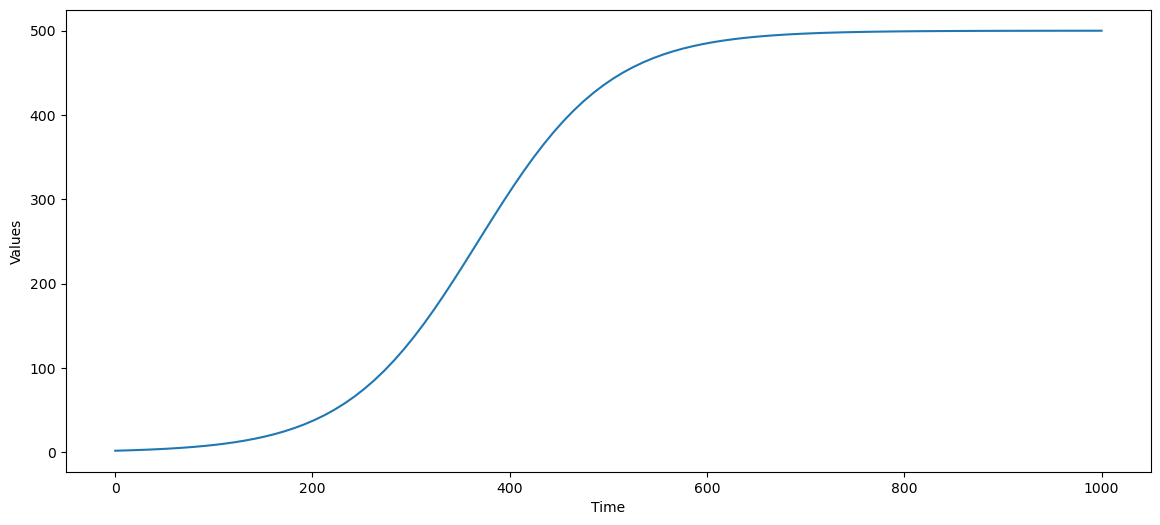

In [14]:
plt.figure(figsize=(14, 6))
plt.xlabel('Time')
plt.ylabel('Values')
plt.plot(times, values)
plt.show()

We now set up an optimisation, to see if we can recover our original parameters from this data.

First, we define a problem (in this case a [single-valued time series fitting problem](https://pints.readthedocs.io/en/latest/core_classes_and_methods.html#pints.SingleOutputProblem)):

In [15]:
problem = pints.SingleOutputProblem(model, times, values)

We then define an [error measure](http://pints.readthedocs.io/en/latest/error_measures.html) on this problem:

In [16]:
error = pints.SumOfSquaresError(problem)

A lot of real problems have physical constraints on the values the parameters can take, so in this example we add them in the form of [boundaries](http://pints.readthedocs.io/en/latest/boundaries.html):

In [17]:
boundaries = pints.RectangularBoundaries([0, 200], [1, 1000])

Finally, we define an initial position to start searching at

In [18]:
x0 = np.array([0.5, 500])

We now run an optimisation, using the [xNES](http://pints.readthedocs.io/en/latest/optimisers/xnes.html) method (although we could also have used a different global [optimiser](http://pints.readthedocs.io/en/latest/optimisers/index.html), like [CMA-ES](http://pints.readthedocs.io/en/latest/optimisers/cmaes.html) or [PSO](http://pints.readthedocs.io/en/latest/optimisers/pso.html)):

In [19]:
found_parameters, found_value = pints.optimise(
    error,
    x0,
    boundaries=boundaries,
    method=pints.XNES,
    )

Minimising error measure
Using Exponential Natural Evolution Strategy (xNES)
Running in sequential mode.
Population size: 6
Iter. Eval. Best      Current   Time    
0     6      5539481   5539481    0:00.0
1     12     4072617   4072617    0:00.0
2     17     4012850   4012850    0:00.0
3     23     3881994   3881994    0:00.0
20    103    2197960   2993724    0:00.0
40    199    1965792   1965792    0:00.0
60    319    1011119   1011119    0:00.0
80    439    219.0919  3510.56    0:00.0
100   559    0.605     3.264092   0:00.0
120   679    0.000482  0.00151    0:00.0
140   799    7.16e-07  2.33e-06   0:00.1
160   919    2e-10     2e-10      0:00.1
180   1039   3.22e-12  8.32e-12   0:00.1
200   1159   8.29e-14  1.36e-13   0:00.1
220   1279   1.34e-15  1.34e-15   0:00.1
240   1399   4.85e-19  2.73e-18   0:00.1
260   1519   1.02e-23  2.3e-21    0:00.1
280   1639   1.68e-24  1.98e-23   0:00.1
300   1759   0         0          0:00.1
320   1879   0         0          0:00.1
340   1999   0 

/home/michael/dev/pints/pints/_optimisers/_xnes.py:84: UserWarning: All points requested by XNES are outside the boundaries.
  warnings.warn(


We can now look at the quality of the fit by running a simulation with the obtained parameters and plotting it on top of the noisy data:

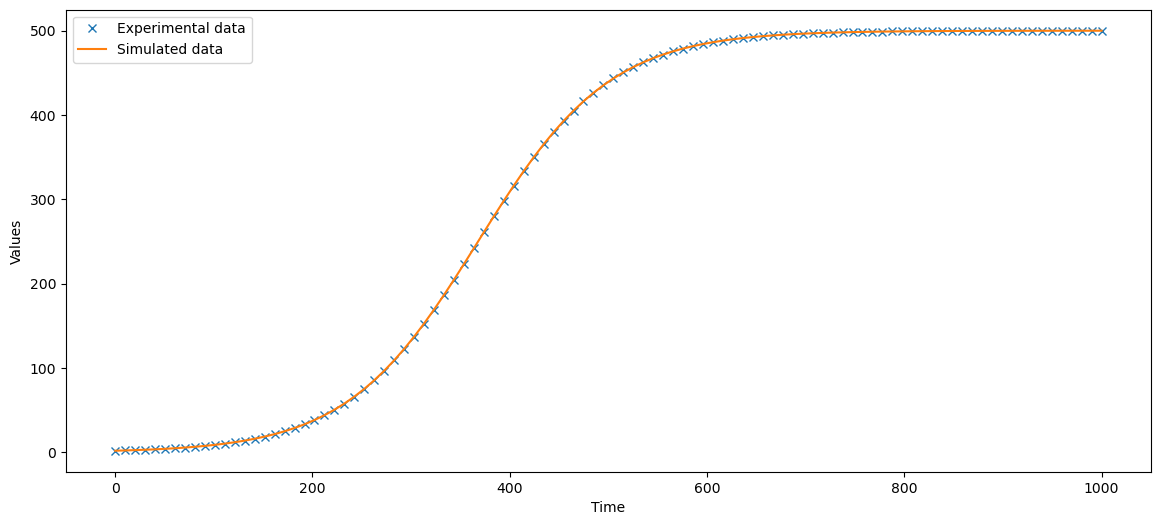

In [20]:
values2 = model.simulate(found_parameters, times)

plt.figure(figsize=(14, 6))
plt.xlabel('Time')
plt.ylabel('Values')
plt.plot(times, values, 'x', label='Experimental data')
plt.plot(times, values2, label='Simulated data')
plt.legend()
plt.show()

Because this was a toy model, we can also compare the parameters with the known true parameters:

In [21]:
print('Found solution:          True parameters:' )
for k, x in enumerate(found_parameters):
    print(pints.strfloat(x) + '    ' + pints.strfloat(real_parameters[k]))

Found solution:          True parameters:
 1.49999999999999994e-02     1.49999999999999994e-02
 5.00000000000000000e+02     5.00000000000000000e+02


## Fitting to noisy data

We now repeat this exercise with noisy data:

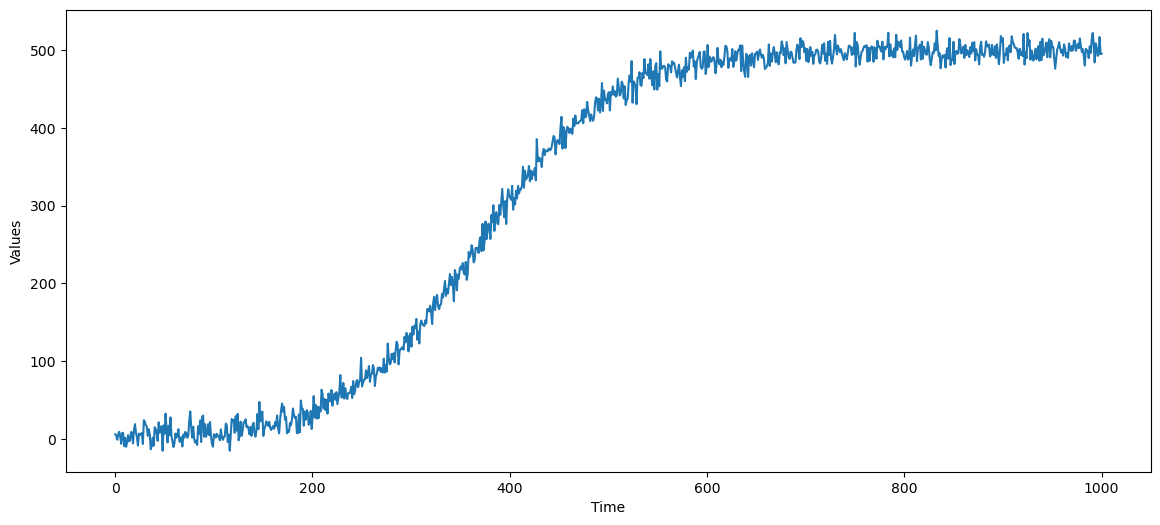

In [22]:
times = np.linspace(0, 1000, 1000)

values = model.simulate(real_parameters, times)
values += np.random.normal(size=values.shape) * 10

plt.figure(figsize=(14, 6))
plt.xlabel('Time')
plt.ylabel('Values')
plt.plot(times, values)
plt.show()

Again, we set up a problem, define an error measure, and run the optimisation:

In [23]:
problem = pints.SingleOutputProblem(model, times, values)
error = pints.SumOfSquaresError(problem)

found_parameters, found_value = pints.optimise(
    error,
    x0,
    boundaries=boundaries,
    method=pints.XNES,
    )

Minimising error measure
Using Exponential Natural Evolution Strategy (xNES)
Running in sequential mode.
Population size: 6
Iter. Eval. Best      Current   Time    
0     6      4.26e+07  4.26e+07   0:00.0
1     10     4.26e+07  4.46e+07   0:00.0
2     10     4.26e+07  inf        0:00.0
3     13     3080891   3080891    0:00.0
20    94     3080891   2.03e+07   0:00.0
40    213    656796.8  656796.8   0:00.0
60    333    104330.7  104653.7   0:00.0
80    453    104266.5  104268     0:00.0
100   573    104266.4  104266.4   0:00.0
120   693    104266.4  104266.4   0:00.1
140   813    104266.4  104266.4   0:00.1
160   933    104266.4  104266.4   0:00.1
180   1053   104266.4  104266.4   0:00.1
200   1173   104266.4  104266.4   0:00.1
220   1293   104266.4  104266.4   0:00.1
240   1413   104266.4  104266.4   0:00.1
260   1533   104266.4  104266.4   0:00.1
280   1653   104266.4  104266.4   0:00.1
300   1773   104266.4  104266.4   0:00.1
320   1893   104266.4  104266.4   0:00.1
340   2013   10

And we can inspect the result by plotting a simulation:

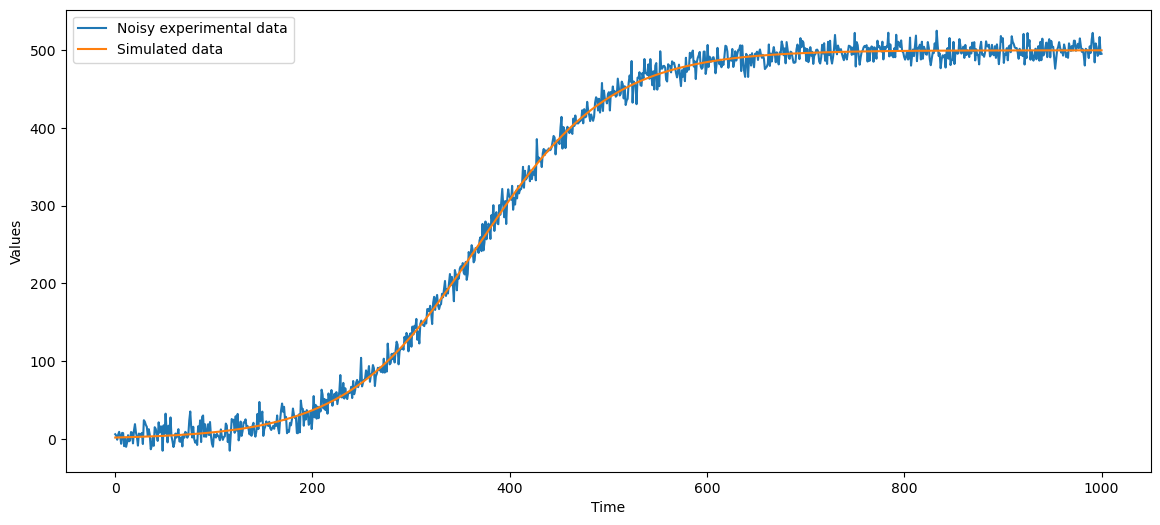

In [24]:
values2 = model.simulate(found_parameters, times)

plt.figure(figsize=(14, 6))
plt.xlabel('Time')
plt.ylabel('Values')
plt.plot(times, values, label='Noisy experimental data')
plt.plot(times, values2, label='Simulated data')
plt.legend()
plt.show()

Looks like a great fit!

Because it's still a toy problem, we can look at the parameter values as well:

In [25]:
print('Found solution:          True parameters:' )
for k, x in enumerate(found_parameters):
    print(pints.strfloat(x) + '    ' + pints.strfloat(real_parameters[k]))

Found solution:          True parameters:
 1.49752545255054589e-02     1.49999999999999994e-02
 4.99702025973736681e+02     5.00000000000000000e+02


So it looks like we were close, but not _exactly_ at the right parameters.

Why didn't we find _exactly_ the right solution in the noisy case?

To investigate this, we start by looking at the error measure, evaluated at the true solution and at the obtained solution:

In [26]:
print('Error at obtained solution: ')
print(error(found_parameters))

print('Error at true solution: ')
print(error(real_parameters))

Error at obtained solution: 
104266.40277168492
Error at true solution: 
104628.42246321507


Another way to compare them is to plot the error function on a line drawn between these points:

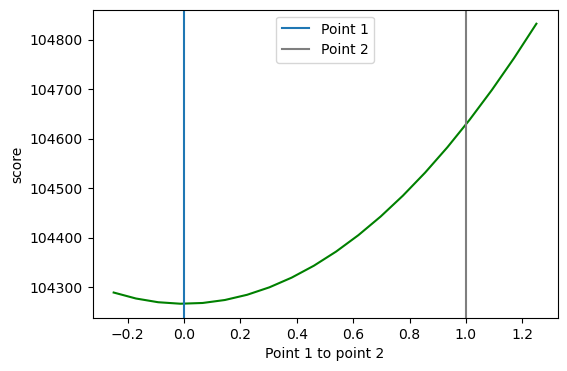

In [27]:
import pints.plot
fig, axes = pints.plot.function_between_points(error, point_1=found_parameters, point_2=real_parameters)
axes.set_ylabel('score')
plt.show()

So it looks like we found a solution that's slightly _better_ than the true solution - how can that be?

The answer comes from the noise we added to our data: it seems the optimiser is able to adjust the model parameters _so that the model reproduces some aspects of the noise signal_.

If we re-run this example (with a different random seed) we'll obtain an error of a slightly different size and direction.
In other words, we can treat our noise as a [finite sample from some distribution](https://en.wikipedia.org/wiki/Sampling_distribution) (in this case a Normal distribution), so that the parameters we infer from this noisy signal will have a slight randomness that should (on average) get worse with an increased variance (noise amplitude) but better with an increased sample size (higher sampling rate).

## Using the "controller" interface to change optimiser settings

In the examples above we ran the optimisation using [`pints.optimise`](https://pints.readthedocs.io/en/stable/optimisers/running.html#pints.optimise).
This is OK for small problems, but for many applications we prefer the extra control offered by the [`OptimisationController`](https://pints.readthedocs.io/en/stable/optimisers/running.html#pints.OptimisationController) class.

This is slightly more verbose:

In [28]:
opt = pints.OptimisationController(error, x0, boundaries=boundaries, method=pints.XNES)
found_parameters, found_value = opt.run()

Minimising error measure
Using Exponential Natural Evolution Strategy (xNES)
Running in sequential mode.
Population size: 6
Iter. Eval. Best      Current   Time    
0     6      4.75e+07  4.75e+07   0:00.0
1     12     4.08e+07  4.08e+07   0:00.0
2     17     4.08e+07  4.11e+07   0:00.0
3     22     4.08e+07  4.08e+07   0:00.0
20    113    7520433   1.49e+07   0:00.0
40    231    6592101   6626759    0:00.0
60    351    5447720   5447720    0:00.0
80    471    2355371   2355371    0:00.0
100   591    2148233   2148233    0:00.1
120   711    753484.7  753484.7   0:00.1
140   831    629881.7  629881.7   0:00.1
160   951    167205.2  169108.6   0:00.1
180   1071   121351.9  121351.9   0:00.1
200   1191   104680.4  104890.1   0:00.1
220   1311   104357    104357     0:00.1
240   1431   104266.4  104266.4   0:00.1
260   1551   104266.4  104266.4   0:00.1
280   1671   104266.4  104266.4   0:00.1
300   1791   104266.4  104266.4   0:00.1
320   1911   104266.4  104266.4   0:00.2
340   2031   10

but much more flexible. For example, we can change the stopping criteria to make it halt quicker:

In [29]:
opt = pints.OptimisationController(error, x0, boundaries=boundaries, method=pints.XNES)
opt.set_max_unchanged_iterations(50)
found_parameters, found_value = opt.run()

Minimising error measure
Using Exponential Natural Evolution Strategy (xNES)
Running in sequential mode.
Population size: 6
Iter. Eval. Best      Current   Time    
0     6      6.15e+07  6.15e+07   0:00.0
1     12     4.88e+07  4.88e+07   0:00.0
2     18     4.02e+07  4.02e+07   0:00.0
3     24     4.02e+07  4.02e+07   0:00.0
20    110    1.34e+07  2.26e+07   0:00.0
40    228    125008.4  275283.7   0:00.0
60    348    104480.5  106409     0:00.0
80    468    104266.4  104266.4   0:00.0
100   588    104266.4  104266.4   0:00.0
120   708    104266.4  104266.4   0:00.1
140   828    104266.4  104266.4   0:00.1
160   948    104266.4  104266.4   0:00.1
180   1068   104266.4  104266.4   0:00.1
200   1188   104266.4  104266.4   0:00.1
220   1308   104266.4  104266.4   0:00.1
221   1308   104266.4  104266.4   0:00.1
Halting: No significant change for 50 iterations.


The controller handles

- logging to screen or disk
- parallelisation
- stopping criteria (*although optimisers may also tell the controller to stop, for example if they can detect they are stuck)

For example, we can tweak the logging output with:

In [30]:
opt = pints.OptimisationController(error, x0, boundaries=boundaries, method=pints.XNES)
opt.set_log_interval(100, warm_up=5)
found_parameters, found_value = opt.run()

Minimising error measure
Using Exponential Natural Evolution Strategy (xNES)
Running in sequential mode.
Population size: 6
Iter. Eval. Best      Current   Time    
0     6      4.3e+07   4.3e+07    0:00.0
1     11     4.04e+07  4.04e+07   0:00.0
2     17     4.04e+07  4.04e+07   0:00.0
3     23     4.04e+07  4.2e+07    0:00.0
4     28     4.04e+07  4.1e+07    0:00.0
5     34     4.04e+07  4.04e+07   0:00.0
100   576    104266.5  104267.2   0:00.0
200   1176   104266.4  104266.4   0:00.1
300   1776   104266.4  104266.4   0:00.1
400   2376   104266.4  104266.4   0:00.2
500   2976   104266.4  104266.4   0:00.2
501   2976   104266.4  104266.4   0:00.2
Halting: No significant change for 200 iterations.


This shows the first 5 iterations (the "warm up") but then logs only every 100th iteration.

Finally, we can ask the controller for a reference to the optimiser object, and use that to configure optimiser-specific settings.
In our example, we set a property of [XNES](https://pints.readthedocs.io/en/stable/optimisers/xnes.html):

In [31]:
opt = pints.OptimisationController(error, x0, boundaries=boundaries, method=pints.XNES)
opt.optimiser().set_population_size(12)
found_parameters, found_value = opt.run()

Minimising error measure
Using Exponential Natural Evolution Strategy (xNES)
Running in sequential mode.
Population size: 12
Iter. Eval.  Best      Current   Time    
0     12      4.02e+07  4.02e+07   0:00.0
1     21      4.01e+07  4.01e+07   0:00.0
2     32      3.99e+07  3.99e+07   0:00.0
3     44      3.99e+07  3.99e+07   0:00.0
20    218     2628626   2628626    0:00.0
40    458     104301.7  104594.1   0:00.0
60    698     104266.4  104266.4   0:00.0
80    938     104266.4  104266.4   0:00.1
100   1178    104266.4  104266.4   0:00.1
120   1418    104266.4  104266.4   0:00.1
140   1658    104266.4  104266.4   0:00.1
160   1898    104266.4  104266.4   0:00.1
180   2138    104266.4  104266.4   0:00.1
200   2378    104266.4  104266.4   0:00.1
220   2618    104266.4  104266.4   0:00.2
240   2858    104266.4  104266.4   0:00.2
260   3098    104266.4  104266.4   0:00.2
280   3338    104266.4  104266.4   0:00.2
300   3578    104266.4  104266.4   0:00.2
320   3818    104266.4  104266.4   